# High-flux electrospray sample injector for X-ray laser imaging

Particle density considerations for the application of a high-flux electrospray ionization source as a sample injector for single particle imaging with XFELs.

In [21]:
%pylab inline
import scipy.constants as constants
import seaborn as sns
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


### Physical units and constants

In [4]:
# Prefixes
kilo = 1E3
milli = 1e-3
micro = 1e-6
nano = 1e-9
pico = 1e-12

# Time
second = 1.
minute = 60.*second
hour = 60.*minute

# Current
ampere = 1.
mA = milli*ampere
uA = micro*ampere
nA = nano*ampere
pA = pico*ampere

# Mass
kg = 1.
u = constants.u * kg
Da = u
kDa = kilo*Da

# Charge
coulomb = 1.
electron = constants.e * coulomb
pAh = pA*hour

# Energy
joule = 1.
eV = electron

# Length
meter = 1.
mm = milli*meter
um = micro*meter

# Volume
liter = (0.1*meter)**3
mL = milli*liter
uL = micro*liter
nL = nano*liter

# Number
mol = constants.N_A
mmol = milli*mol
umol = micro*mol
nmol = nano*mol

## 1) Electrospray

### 1.1) Electrospray flow rate

In [5]:
print "EXP. PARAMETERS:"

# Concentration (1/m3)
c = 10 * umol/liter
print "Molecule concentration:  \t c = %.1f uM" % (c/(umol/liter))

# Volumetric flow rate (m3/sec) of sample solution
flow = 100 * nL/minute
print "Liquid volume flow rate: \t f = %.2f mL/hour" % (flow/(mL/hour))

print ""
print "RESULT:"

# => Molecular flow rate (1/sec)
F_ES = lambda flow, c: flow * c
print "Molecular flow rate:    \t F_ES = %.3e 1/sec" % (F_ES(flow, c))

EXP. PARAMETERS:
Molecule concentration:  	 c = 10.0 uM
Liquid volume flow rate: 	 f = 0.01 mL/hour

RESULT:
Molecular flow rate:    	 F_ES = 1.004e+10 1/sec


### 1.2) Electrospray ion current

In [7]:
print "EXP. PARAMETERS:"

# Charge state for Haemoglobin
z = 17
print "Charge state: \t z = %i" % z

print ""
print "RESULT:"

# => Ion current of electrospray (A)
I_ES = lambda f, c, z: z * electron * F_ES(f, c)
print "Ion current of electrospray: \t %.2f nA" % (I_ES(flow, c, z)/(nano*ampere))

EXP. PARAMETERS:
Charge state: 	 z = 17

RESULT:
Ion current of electrospray: 	 27.34 nA


## 2) Molecules in vacuum amenable for imaging

### 2.1) Molecule velocity at interaction point

In [8]:
print "EXP. PARAMETERS:"

# Mass of Heamoglobin
m = 64000*u
print "Molecular mass: \t %.1f kDa" % (m/kDa)

# Kinetic energy of ions
E = 5*eV
print "Kinetic energy: \t %.1f eV" % (E/eV)

print ""
print "RESULT:"

# Velocity
v = lambda E, m: sqrt(2*E/m)
print "Velocity of ions: \t %.1f m/s" % (v(E, m))

EXP. PARAMETERS:
Molecular mass: 	 64.0 kDa
Kinetic energy: 	 5.0 eV

RESULT:
Velocity of ions: 	 122.8 m/s


### 2.2) Molecule flux and density at interaction point

In [13]:
print "EXP. PARAMETERS"

# Effective ion current
I_eff = 100 * pA
print "Effective ion current: \t %.1f pA (transmission = %.2f %%)" % (I_eff/pA, I_eff/I_ES(flow, c, z)*100.)

# Particle beam diameter
d_beam = 100 * um
print "Particle beam diameter:\t %.1f um" % (d_beam/um)

# X-ray beam diameter
d_xray = 1 * um
print "X-ray beam diameter: \t %.1f um" % (d_xray/um)

print "RESULT:"

# Beam cross section
A_beam = lambda d_beam: pi*(d_beam/2.)**2
print "Beam cross section:         \t %.1f um2" % (A_beam(d_beam)/(um)**2)

# Fill volume in one second
V_per_sec = lambda d_beam, E, m: A_beam(d_beam)*v(E, m)
print "Beam fills volume per second: \t %.2f mm3/s" % (V_per_sec(d_beam, E, m)/(mm**3/second))

# Particle flux
F_eff = lambda I_eff, z: I_eff/(z*electron)
print "Particle flux:           \t %.3e 1/sec" % F_eff(I_eff, z)

# Particle number density
rho = lambda I_eff, z, d_beam, E, m: F_eff(I_eff, z) / V_per_sec(d_beam, E, m)
print "Particle number density: \t %.3e 1/um3" % (rho(I_eff, z, d_beam, E, m)*um**3)

# Hit ratio
hit_ratio = lambda I_eff, z, d_beam, E, m, d_xray: rho(I_eff, z, d_beam, E, m) * (d_xray**2*d_beam)
print "Hit ratio:              \t %.1f %%" % (hit_ratio(I_eff, z, d_beam, E, m, d_xray)*100.)

EXP. PARAMETERS
Effective ion current: 	 100.0 pA (transmission = 0.37 %)
Particle beam diameter:	 100.0 um
X-ray beam diameter: 	 1.0 um
RESULT:
Beam cross section:         	 7854.0 um2
Beam fills volume per second: 	 964.34 mm3/s
Particle flux:           	 3.671e+07 1/sec
Particle number density: 	 3.807e-05 1/um3
Hit ratio:              	 0.4 %


### 2.3) Molecule bunching for EuXFEL


<img src="euxfel_time_structure.png" alt="Drawing" style="width: 600px;"/>

*Reference:* Schneidmiller and Yurkov, 2011 (doi:10.3204/DESY11-152)

In [55]:
print "EXP. PARAMETERS:"

t_period = 100. * milli*second
print "Time between trains:    \t %.1f us" % (t_period/(micro*second))

t_pulse = 220. * nano*second
print "Time between pulses in train: \t %.3f us" % (t_pulse/(micro*second))

t_train = 600. * micro*second
print "Pulse train duration:    \t %.1f us" % (t_train/(micro*second))


print ""
print "RESULT"

bunching_factor = lambda t_period, t_train: t_period/t_train
print "Increase of hit ratio if ions bunched in sync with trains: Bunching factor %.1f" % bunching_factor(t_period, t_train) 

ion_bunch_length = lambda t_train, E, m: t_train*v(E, m)
print "Desired ion bunch length: \t %.1f mm" % (ion_bunch_length(t_train, E, m)/mm)

hit_ratio_bunched = lambda I_eff, z, d_beam, E, m, d_xray, t_period, t_train: hit_ratio(I_eff, z, d_beam, E, m, d_xray) * bunching_factor(t_period, t_train) 
print "Hit ratio is using ion bunching: %.1f %%" % (hit_ratio_bunched(I_eff, z, d_beam, E, m, d_xray, t_period, t_train)*100.)

EXP. PARAMETERS:
Time between trains:    	 100000.0 us
Time between pulses in train: 	 0.220 us
Pulse train duration:    	 600.0 us

RESULT
Increase of hit ratio if ions bunched in sync with trains: Bunching factor 166.7
Desired ion bunch length: 	 73.7 mm
Hit ratio is using ion bunching: 63.5 %


### 2.4) Particle velocities and X-ray pulse separation

Min. velocity to repopulate interaction volume between pulses: 4.5 m/s


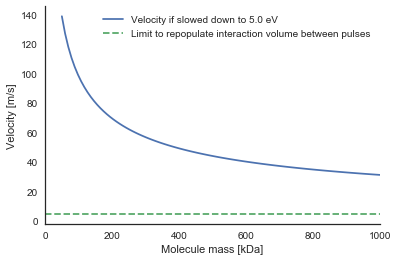

In [40]:
m_arr = linspace(50, 1000, 100) * kDa
v_arr = v(E, m_arr)
plot(m_arr/kDa, v_arr, label="Velocity if slowed down to %.1f eV" % (E/eV))
v_min = lambda d_xray, t_pulse: d_xray/t_pulse
print "Min. velocity to repopulate interaction volume between pulses: %.1f m/s" % (v_min(d_xray, t_pulse))
axhline(v_min(d_xray, t_pulse), ls="--", color="C1", label="Limit to repopulate interaction volume between pulses")
xlim(0, 1000)
xlabel("Molecule mass [kDa]")
ylabel("Velocity [m/s]")
legend()
sns.despine()

### 2.5) Hit ratio as a function of molecule beam width

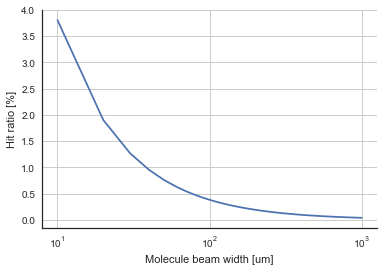

In [53]:
d_beam_arr = linspace(10, 1000, 100) * um
hit_ratio_arr = hit_ratio(I_eff, z, d_beam_arr, E, m, d_xray)
semilogx(d_beam_arr/um, hit_ratio_arr*100.)
grid(True)
xlabel("Molecule beam width [um]")
ylabel("Hit ratio [%]")
legend()
sns.despine()

### 2.6) Hit ratio as a function of bunching factor

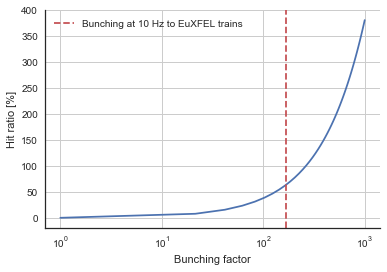

In [59]:
bunching_factor_arr = linspace(1, 1E3)
hit_ratio_bunched_arr = hit_ratio_bunched(I_eff, z, d_beam, E, m, d_xray, bunching_factor_arr, 1.)
semilogx(bunching_factor_arr, hit_ratio_bunched_arr*100.)
axvline(bunching_factor(t_period, t_train), ls="--", color="C2", label="Bunching at 10 Hz to EuXFEL trains")
grid(True)
xlabel("Bunching factor")
ylabel("Hit ratio [%]")
legend()
sns.despine()